Best learning rate: 0.1, with Mean Squared Error: 9.452659606933594


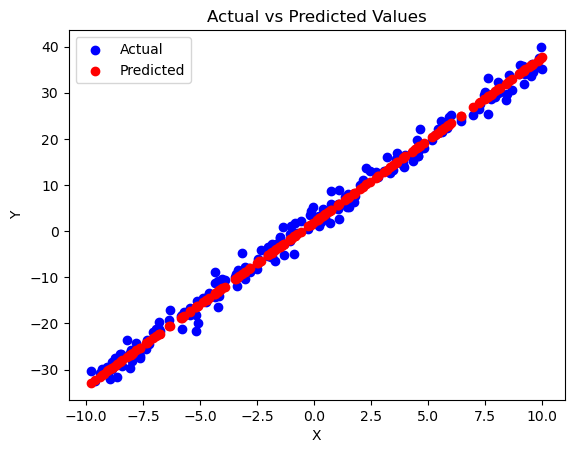

Mean Squared Error on the test set: 3.1355888843536377


In [1]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Create data
np.random.seed(0)
x = np.random.uniform(-10, 10, 1000)
y = 3.5 * x + 2 + np.random.normal(0, 2, 1000)

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
x_train = torch.from_numpy(x_train).float().view(-1, 1)
x_test = torch.from_numpy(x_test).float().view(-1, 1)
y_train = torch.from_numpy(y_train).float().view(-1, 1)
y_test = torch.from_numpy(y_test).float().view(-1, 1)

learning_rates = [0.1, 0.01, 0.001, 0.0001]  # define the list of learning rates you want to try

best_mse = float('inf')  # initialize with infinity
best_lr = 0  # initialize with 0

for lr in learning_rates:
    model = nn.Linear(1, 1)  # define the model
    optimizer = optim.Adam(model.parameters(), lr=lr)  # define the optimizer
    criterion = nn.MSELoss()  # define the loss function

    # Train the model
    for epoch in range(50):
        optimizer.zero_grad()  # reset gradients
        y_pred = model(x_train)  # forward pass
        loss = criterion(y_pred, y_train)  # calculate the loss
        loss.backward()  # backward pass
        optimizer.step()  # update the weights

    # Evaluate the model
    with torch.no_grad():
        y_pred = model(x_test)
        mse = criterion(y_pred, y_test)
        mse = mse.item()
        if mse < best_mse:
            best_mse = mse
            best_lr = lr

print(f"Best learning rate: {best_lr}, with Mean Squared Error: {best_mse}")

# Train the final model with the best learning rate
model = nn.Linear(1, 1)  # define the model
optimizer = optim.Adam(model.parameters(), lr=best_lr)  # define the optimizer
criterion = nn.MSELoss()  # define the loss function

# Train the model
for epoch in range(50):
    optimizer.zero_grad()  # reset gradients
    y_pred = model(x_train)  # forward pass
    loss = criterion(y_pred, y_train)  # calculate the loss
    loss.backward()  # backward pass
    optimizer.step()  # update the weights

# Evaluate and plot
with torch.no_grad():
    y_pred = model(x_test).numpy()
    mse = criterion(model(x_test), y_test)
    mse = mse.item()

plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(f"Mean Squared Error on the test set: {mse}")
